# Breast Cancer Wiscosin

In [113]:
#necessory libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler,LabelEncoder

from sklearn.model_selection import train_test_split

In [114]:
# load dataset with given column name
column_name = [
'Id',
'Outcome',
'radius_mean', 
'texture_mean', 
'perimeter_mean',
'area_mean', 
'smoothness_mean', 
'compactness_mean', 
'concavity_mean',
'concave points_mean', 
'symmetry_mean', 
'fractal_dimension_mean',
'radius_se', 
'texture_se', 
'perimeter_se', 
'area_se', 
'smoothness_se',
'compactness_se', 
'concavity_se', 
'concave points_se', 
'symmetry_se',
'fractal_dimension_se', 
'radius_worst', 
'texture_worst',
'perimeter_worst', 
'area_worst', 
'smoothness_worst',
'compactness_worst', 
'concavity_worst', 
'concave points_worst',
'symmetry_worst', 
'fractal_dimension_worst'

]


data = pd.read_csv("Breast Cancer Wisconsin (Diagnostic) -wbc.csv",names=column_name)

data

,Id,Outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [115]:
#checking null values
data.isna().sum()

Id                         0
Outcome                    0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [116]:
# finding datatypes of each variable
data.dtypes

Id                           int64
Outcome                     object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [117]:
# converting outcome (target) into numerical

label = LabelEncoder()
data["Outcome"]=label.fit_transform(data["Outcome"])

In [118]:
# M" stands for "Malignant": This indicates that the tumor is cancerous

# "B" stands for "Benign": This indicates that the tumor is not cancerous


In [119]:
data

,Id,Outcome,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [120]:
# column "Id" is independent on outcome(target)
data = data.drop("Id",axis=1)

In [121]:
#split data into features and target

x = data.drop("Outcome",axis=1)
# x implies  features
y=data["Outcome"]
# y implies target

In [127]:
def train_model(model, x_train, y_train, x_test, y_test):
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    
    return y_pred, accuracy, conf_matrix, classification_rep

In [128]:
def plot_confusion_matrix(conf_matrix, classes):
    plt.figure(figsize=(6, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [129]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=121)

In [130]:
# normalize the variables
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [145]:
#hyperparamater tuning
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import MultinomialNB,GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

from sklearn.model_selection import cross_val_score,GridSearchCV

warnings.filterwarnings("ignore")

In [146]:
# finding which algorithm is best for this dataset using hyperparameter tuning

log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=5)  

svm_score=cross_val_score(SVC(),X=x,y=y)  

rf_score=cross_val_score(RandomForestClassifier(random_state=15),x,y) 

Ada_score=cross_val_score(AdaBoostClassifier(),x,y)

multi_score=cross_val_score(MultinomialNB(),x,y)

kn_score=cross_val_score(KNeighborsClassifier(n_neighbors=5),x,y)


In [147]:
print(log_score)

print(svm_score)

print(rf_score)

print(Ada_score)

print(multi_score)

print(kn_score)

[0.92982456 0.93859649 0.96491228 0.95614035 0.95575221]
[0.85087719 0.89473684 0.92982456 0.94736842 0.9380531 ]
[0.92105263 0.95614035 0.99122807 0.97368421 0.97345133]
[0.93859649 0.97368421 0.99122807 0.99122807 0.96460177]
[0.86842105 0.90350877 0.88596491 0.92105263 0.90265487]
[0.88596491 0.93859649 0.93859649 0.94736842 0.92920354]


In [148]:
#finding mean value

print(np.mean(log_score))

print(np.mean(svm_score))

print(np.mean(rf_score))

print(np.mean(Ada_score))

print(np.mean(multi_score))

print(np.mean(kn_score))

0.9490451793199813
0.9121720229777983
0.9631113181183046
0.9718677224033534
0.8963204471355379
0.9279459711224964


In [149]:
# from here , we recognize  that "adaboost algorithm" is best for this dataset
# find best parameters using gridsearchcv
ada = AdaBoostClassifier(base_estimator=None)

# Define a parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 1.0]  
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}


In [150]:
# Adaboost classifier
model = AdaBoostClassifier(n_estimators=200,
    learning_rate=.1,)
y_pred, accuracy, conf_matrix, classification_rep = train_model(model, x_train, y_train, x_test, y_test)

# Display results
print(f"Accuracy_score: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Accuracy_score: 1.00

Confusion Matrix:
[[70  0]
 [ 0 44]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        44

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



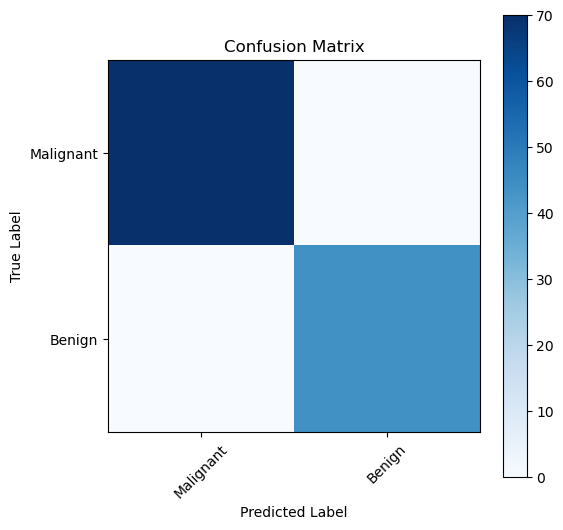

In [151]:
plot_confusion_matrix(conf_matrix, classes=['Malignant', 'Benign'])


## Visualisation

0    357
1    212
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Distribution of Target Classes')

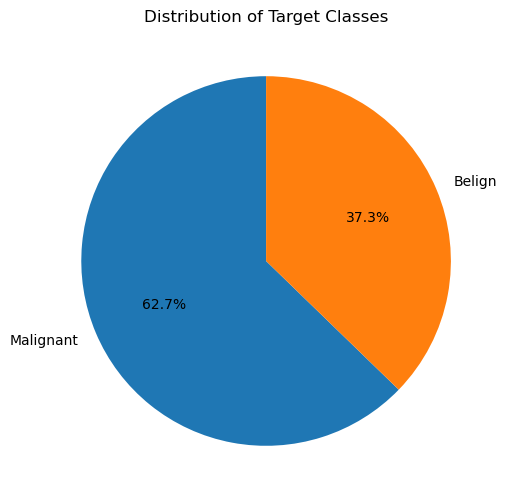

In [140]:
target_counts = data['Outcome'].value_counts()
print(target_counts)
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=["Malignant","Belign"], autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Target Classes")

Text(0.5, 1.0, 'Count Plot of Target Classes')

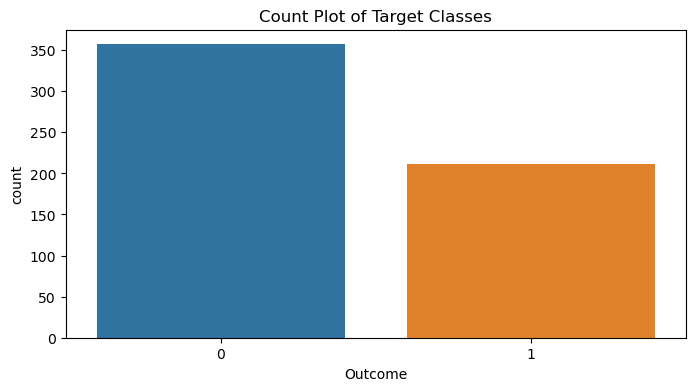

In [154]:
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Outcome')
plt.title("Count Plot of Target Classes")

In [159]:
# savig the model
import joblib
joblib.dump(model,'joblib_model')
new_model=joblib.load('joblib_model')
